<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Sciences</center>
# <center>Network Data</center>
---

# Matrix representation of graph

In [6]:
!pip install pydot

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot

In [19]:
A = np.array([[0,1,0],
              [1,0,1],
              [1,0,0]])
print(A)

[[0 1 0]
 [1 0 1]
 [1 0 0]]


In [13]:
A = np.array([[0,1,0],
              [1,0,1]])
A.shape[0]

2

In [25]:
G = nx.from_numpy_array(A, create_using=nx.MultiDiGraph)
G = nx.relabel_nodes(G, {0:'A',1:'B',2:'C'})
#สร้าง MultiDiGraph label ให้มี A B C

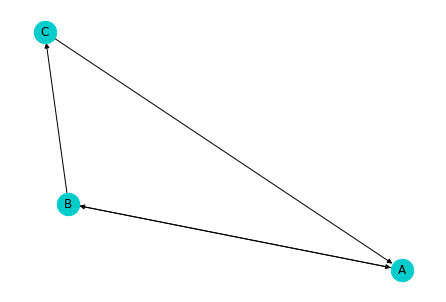

In [26]:
nx.draw(G, with_labels=True, node_size=500, node_color='#00CCCC')

# From Pandas adjacency

In [27]:
import pandas as pd
A_df = pd.DataFrame(A, 
                    columns=['A','B','C'], 
                    index=['A','B','C'])
A_df
#adjacency คือการแทนด้วย array ขนาด n*n และจะให้ node ที่มีความสัมพันธ์กันมีค่า = 1

,A,B,C
A,0,1,0
B,1,0,1
C,1,0,0


In [38]:
A_df.columns

Index(['A', 'B', 'C'], dtype='object')

In [39]:
G_df = nx.from_pandas_adjacency(A_df)

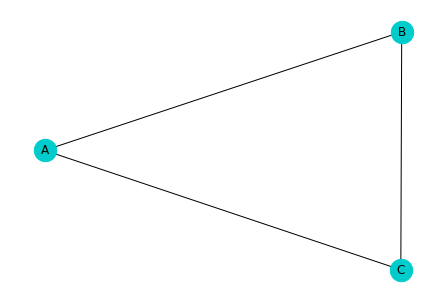

In [40]:
nx.draw(G_df, with_labels=True, node_size=500, node_color='#00CCCC')

# Traversal as a matrix operation

เอาไว้ดูการเส้นทางเดินกราฟ โดยการเอาตัวมันคูณกันเอง

In [20]:
A2 = np.matmul(A,A)
print(A2)
#matmul คือเอาตัวเองคูณกับตัวเอง

[[1 0 1]
 [1 1 0]
 [0 1 0]]


In [21]:
G2 = nx.from_numpy_array(A2, create_using=nx.MultiDiGraph)
G2 = nx.relabel_nodes(G2, {0:'A',1:'B',2:'C'})
#label ให้มี A B C

In [22]:
# Need to install pydot
G2_v = nx.nx_pydot.to_pydot(G2)

In [ ]:
G2_v.write_png('test.png')

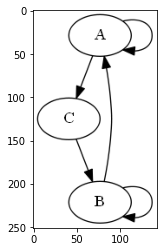

In [24]:
plt.imshow(plt.imread('test.png'))

# Edge List Representation

In [17]:
el = pd.DataFrame({'source':['A','B','B','C'], 
                   'target':['B','A','C','A']})
print(el)

  source target
0      A      B
1      B      A
2      B      C
3      C      A


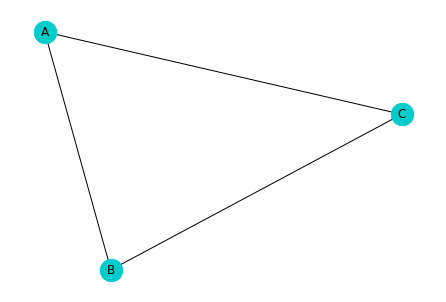

In [16]:
G_el = nx.from_pandas_edgelist(el)
nx.draw(G_el, with_labels=True, node_size=500, node_color='#00CCCC')

# Networkx object - Graph

## Create graph and add nodes

In [16]:
nx.__version__

'2.6.2'

In [44]:
G = nx.Graph()
#สร้าง graph เปล่า

In [45]:
G.add_node(1)
#ใส่ 1 ลงไปในกราฟ

In [46]:
G.add_nodes_from([2,3])
#ใส่ 2,3 ลงไปในกราฟ

In [47]:
H = nx.path_graph(10) #สร้าง H ขึ้นมาให้มี 10 ตัว
G.add_nodes_from(H) #เอา node จาก H เพิ่มเข้าไป

In [48]:
G.nodes() #ที่เพิ่มมาก่อนก็อยู่ก่อน ที่เหลือก็ไ่ของ H ไปจนครบ

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

## Add edges

In [49]:
G.add_edge(2,3)

In [50]:
G.add_edges_from([(1,2),(1,3)])

In [51]:
G.add_edges_from(H.edges())

In [53]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [26]:
G.remove_node(9)

In [27]:
G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8))

In [28]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

# Add number of nodes/edges

In [29]:
G.number_of_edges()

9

In [30]:
G.number_of_nodes()

9

In [31]:
#G.number_of_selfloops()
nx.number_of_selfloops(G)

0

# Graph information

In [32]:
print(nx.info(G))

Graph with 9 nodes and 9 edges


# Degree

In [54]:
G = nx.read_edgelist('facebook_combined.txt', 
                     create_using=nx.MultiDiGraph)

In [55]:
print(nx.info(G))

MultiDiGraph with 4039 nodes and 88234 edges


In [56]:
pd.DataFrame(G.degree, columns=['Node','Degree'])
#Degree จำนวน edge ที่ต่อกับ node นั้นถ้ามี loop นับเป็น 2 

,Node,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


In [36]:
nx.write_graphml(G,'test.graphml')

# In/Out Degree

In [37]:
pd.DataFrame(G.in_degree, columns=['Node','Degree'])
#in_degree คือจำนวนที่วิ่งเข้า node นั้น

,Node,Degree
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


In [38]:
pd.DataFrame(G.out_degree, columns=['Node','Degree'])
#in_degree คือจำนวนที่วิ่งออก node นั้น

,Node,Degree
0,0,347
1,1,16
2,2,9
3,3,16
4,4,9
...,...,...
4034,4034,0
4035,4035,0
4036,4036,0
4037,4037,0


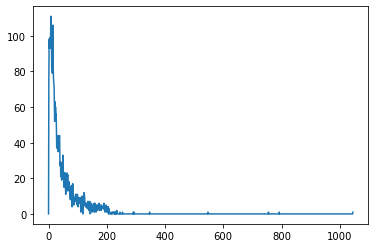

In [39]:
plt.plot(nx.degree_histogram(G))

# Neighbor

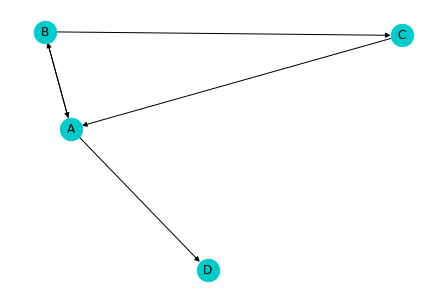

In [40]:
G1 = nx.from_pandas_adjacency(A_df, create_using=nx.MultiDiGraph)
G1.add_edge('A','D')
nx.draw(G1, with_labels=True, node_size=500, node_color='#00CCCC')
plt.show()

In [41]:
[x for x in nx.neighbors(G1,'A')]
#เป็น neighbors ต้องเชื่อมกันแบบ undirected ถ้าเป็น directed จะแสดงผลของตัวฝั่งซ้ายและขวาออกมา predecessor, successor

['B', 'D']

In [42]:
[x for x in nx.all_neighbors(G1,'A')]
#เป็น neighbors ต้องเชื่อมกันแบบ undirected ถ้าเป็น directed จะแสดงผลของตัวฝั่งซ้ายและขวาออกมา predecessor, successor
#เอาทุกอันทั้งวิ่งเาและวิ่งออก

['B', 'C', 'B', 'D']

# Common neighbors (for undirected graph)


เอา neighbors มา intersec กัน ถ้าเทียบเป็น facebook สามารถเอาไว้ดูประมาณว่ามีเพื่อนร่วมกันคือใครบ้าง

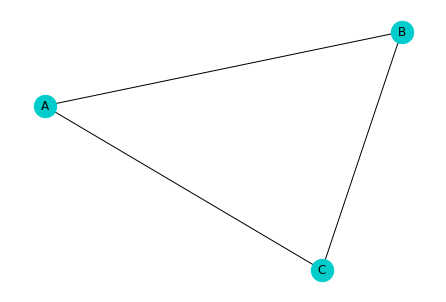

In [43]:
nx.draw(G_df, with_labels=True, node_size=500, node_color='#00CCCC')
plt.show()

In [44]:
[x for x in nx.common_neighbors(G_df,'B','A')]

['C']

# Subgraph

ดึงกราฟที่อยู่ภายในกราฟออกมา

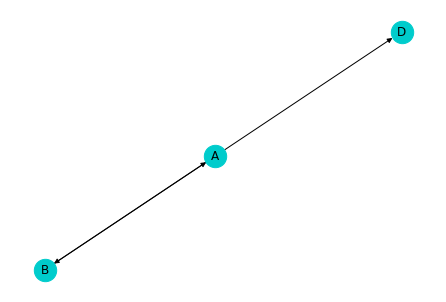

In [45]:
G1_sub = nx.subgraph(G1,['A','B','D'])
nx.draw(G1_sub, with_labels=True, node_size=500, node_color='#00CCCC')

# Path

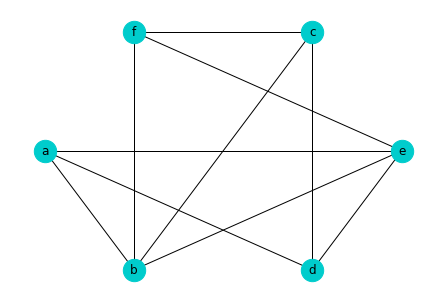

In [46]:
el2 = pd.DataFrame([['a','b'],
                    ['a','d'],
                    ['a','e'],
                    ['b','c'],
                    ['b','e'],
                    ['b','f'],
                    ['c','d'],
                    ['c','f'],
                    ['d','e'],
                    ['e','f']], columns=['source','target'])
G2 = nx.from_pandas_edgelist(el2)
nx.draw_shell(G2, with_labels=True, node_size=500, node_color='#00CCCC')

In [47]:
[x for x in nx.simple_paths.all_simple_paths(G2,'a','c')]
#เดินทางจาก A - C ด้วยเส้นทางแบบใดได้บ้างที่ไม่ซ้ำ path เดิม

[['a', 'b', 'c'],
 ['a', 'b', 'e', 'd', 'c'],
 ['a', 'b', 'e', 'f', 'c'],
 ['a', 'b', 'f', 'c'],
 ['a', 'b', 'f', 'e', 'd', 'c'],
 ['a', 'd', 'c'],
 ['a', 'd', 'e', 'b', 'c'],
 ['a', 'd', 'e', 'b', 'f', 'c'],
 ['a', 'd', 'e', 'f', 'b', 'c'],
 ['a', 'd', 'e', 'f', 'c'],
 ['a', 'e', 'b', 'c'],
 ['a', 'e', 'b', 'f', 'c'],
 ['a', 'e', 'd', 'c'],
 ['a', 'e', 'f', 'b', 'c'],
 ['a', 'e', 'f', 'c']]

# Shortest path

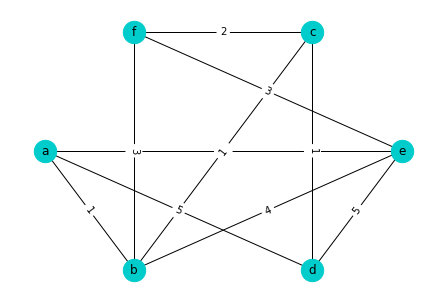

In [48]:
elw = pd.DataFrame([['a','b',1],
                    ['a','d',5],
                    ['a','e',2],
                    ['b','c',1],
                    ['b','e',4],
                    ['b','f',3],
                    ['c','d',1],
                    ['c','f',2],
                    ['d','e',5],
                    ['e','f',3]], columns=['source','target','weight'])
G2 = nx.from_pandas_edgelist(elw,edge_attr='weight')
nx.draw_shell(G2, with_labels=True, node_size=500, node_color='#00CCCC')
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2,pos=nx.shell_layout(G2),edge_labels=labels)
plt.show()

In [49]:
nx.shortest_path(G2,'a','d',weight='weight')

['a', 'b', 'c', 'd']

# Connected component

แบ่งกราฟออกเป็นกลุ่มที่เชื่อมต่อติดกัน

In [50]:
A3 = pd.read_csv('components.csv',index_col=0)
print(A3)

    A1  A2  A3  A4  A5  A6  A7  A8
A1   0   1   0   1   0   0   0   0
A2   0   0   1   1   0   0   0   0
A3   1   1   0   1   0   0   0   0
A4   1   0   0   0   0   0   0   0
A5   0   0   0   0   0   1   0   1
A6   0   0   0   0   0   0   1   1
A7   0   0   0   0   1   1   0   0
A8   0   0   0   0   0   1   1   0


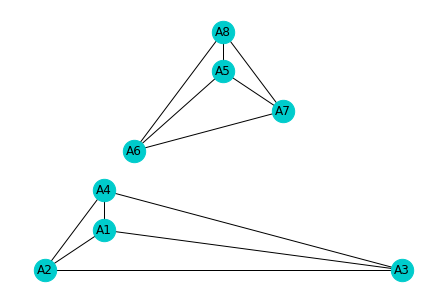

In [51]:
G3 = nx.from_pandas_adjacency(A3)
nx.draw_planar(G3, with_labels=True, node_size=500, node_color='#00CCCC')

In [52]:
[x for x in nx.connected_components(G3)]
# ให้ออกมาเป็น set ของ node ที่ต่อกัน

[{'A1', 'A2', 'A3', 'A4'}, {'A5', 'A6', 'A7', 'A8'}]

In [53]:
nx.get_edge_attributes(G2,'weight')

{('a', 'b'): 1,
 ('a', 'd'): 5,
 ('a', 'e'): 2,
 ('b', 'c'): 1,
 ('b', 'e'): 4,
 ('b', 'f'): 3,
 ('d', 'c'): 1,
 ('d', 'e'): 5,
 ('e', 'f'): 3,
 ('c', 'f'): 2}

# Lab-Network data

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot
import pandas as pd

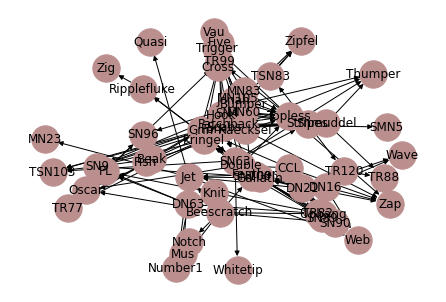

In [43]:
doledge = pd.read_csv('dolphin_edges.csv')
graph = nx.from_pandas_edgelist(doledge, source='From', target='To', create_using=nx.MultiDiGraph)
nx.draw(graph, with_labels=True, node_size=750, node_color='#bc8f8f')

In [44]:
nx.info(graph)

'MultiDiGraph with 62 nodes and 159 edges'

## 1.Who are the most poppular?

Ans : Web & Trigger

In [45]:
x = pd.DataFrame(graph.in_degree, columns=['From','To'])

In [46]:
x.sort_values(by=['To'] ,ascending=False)

,From,To
49,Trigger,9
56,Web,9
43,Topless,8
35,SN4,7
38,SN9,7
...,...,...
48,Cross,0
12,Beescratch,0
16,DN63,0
34,MN60,0


## 2. Pick 2 individuals, find the shortest path between them

Ans : the shortest path of "Grin" and "Web" is ['Grin', 'Hook', 'Kringel', 'SN100', 'SN89', 'Web']

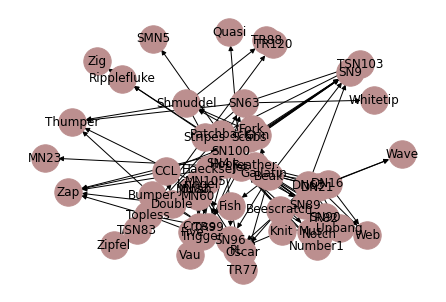

In [48]:
graph = nx.from_pandas_edgelist(doledge, source='From', target='To', create_using=nx.MultiDiGraph)
nx.draw(graph, with_labels=True, node_size=750, node_color='#bc8f8f')

In [49]:
nx.shortest_path(graph,'Grin','Web', weight ='weight')

['Grin', 'Hook', 'Kringel', 'SN100', 'SN89', 'Web']

## 3. What does the shortest path mean?

Ans : เป็นเส้นทางที่สั้นที่สุดจากการเชื่อมต่อกันระหว่าง "Grin" กับ "Web" ซึ่งเส้นทางที่สั้นที่สุดจะเป็นการเชื่อมกันโดยผ่าน Node "Hook", "Kringel", "SN100", "SN89"

## 4. Find how many components are there in the network

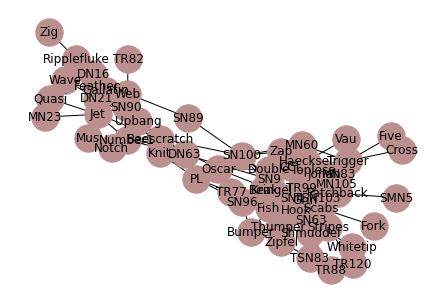

In [51]:
graphA = nx.from_pandas_edgelist(doledge, source='From', target='To')
nx.draw(graphA, with_labels=True, node_size=750, node_color='#bc8f8f')

In [52]:
dol=[x for x in nx.connected_components(graphA)]
dol

[{'Beak',
  'Beescratch',
  'Bumper',
  'CCL',
  'Cross',
  'DN16',
  'DN21',
  'DN63',
  'Double',
  'Feather',
  'Fish',
  'Five',
  'Fork',
  'Gallatin',
  'Grin',
  'Haecksel',
  'Hook',
  'Jet',
  'Jonah',
  'Knit',
  'Kringel',
  'MN105',
  'MN23',
  'MN60',
  'MN83',
  'Mus',
  'Notch',
  'Number1',
  'Oscar',
  'PL',
  'Patchback',
  'Quasi',
  'Ripplefluke',
  'SMN5',
  'SN100',
  'SN4',
  'SN63',
  'SN89',
  'SN9',
  'SN90',
  'SN96',
  'Scabs',
  'Shmuddel',
  'Stripes',
  'TR120',
  'TR77',
  'TR82',
  'TR88',
  'TR99',
  'TSN103',
  'TSN83',
  'Thumper',
  'Topless',
  'Trigger',
  'Upbang',
  'Vau',
  'Wave',
  'Web',
  'Whitetip',
  'Zap',
  'Zig',
  'Zipfel'}]

In [53]:
len(dol)
#นั่นแสดงว่าทุกตัวเชื่อมต่อถึงกันทั้งหมด

1